In [1]:
import os
import sys
import numpy as np
%matplotlib inline 
from matplotlib import pyplot as plt

from PyRuntime import ExecutionSession

In [2]:
! onnx-mlir ./lenet.onnx 

Shared library ./lenet.so has been compiled.


In [3]:
session = ExecutionSession('./lenet.so', "run_main_graph")

In [4]:
from torchvision import transforms
import torchvision
from torch.utils import data

def load_data_mnist(batch_size, resize=None):
    """Download the Fashion-MNIST dataset and then load it into memory."""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.MNIST(root="../data",
                                                    train=True,
                                                    transform=trans,
                                                    # transform=transforms.Compose([transforms.ToTensor()]),
                                                    download=True)
    mnist_test = torchvision.datasets.MNIST(root="../data",
                                                   train=False,
                                                   transform=trans,
                                                   download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=4),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=4))

In [5]:
train_iter, _ = load_data_mnist(batch_size=1)


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw




Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw




Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw




Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [6]:
from PIL import Image
%matplotlib inline 
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt

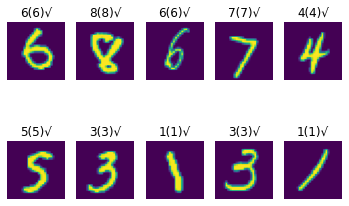

In [17]:
img_num, cnt = 10, 0
col = 5 
row = img_num // col 
fig = plt.figure()
for i, (X, y) in enumerate(train_iter):
  input = X.numpy()
  outputs = session.run([input])
  output = outputs[0]
  # print(f'predict as {np.argmax(output)}, ground truth is {y.numpy()[0]}')

  fig.add_subplot(row, col, i + 1)
  img = X[0][0]
  imshow(img)
  plt.title(f"{np.argmax(output)}({y.numpy()[0]}){'√' if np.argmax(output) == y.numpy()[0] else 'x'}")
  plt.axis('off')

  cnt += 1
  if cnt == 10:
    break